准确率： 0.9111111111111111
准确率： 0.9111111111111111
精确度： 0.9150997150997152
召回率： 0.9111111111111111


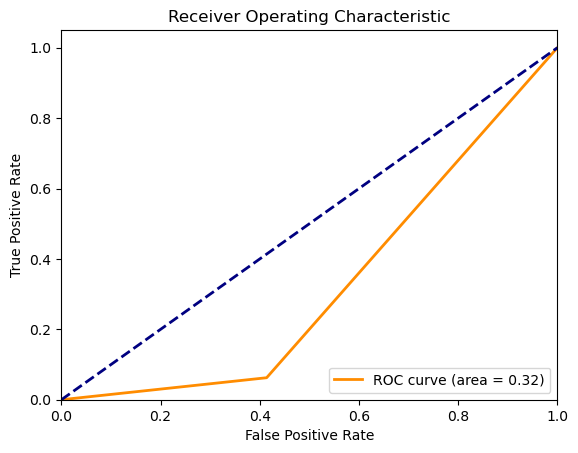

AUC值： 0.3243534482758621


In [4]:
# 导入所需的库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标标签

# 将数据集分隔成训练集和测试集（70%训练集，30%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4552)

# 初始化决策树分类器
clf = DecisionTreeClassifier(random_state=425464)

# 训练模型
clf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

# new_data = [[5.1, 3.5, 1.4, 0.2]]  # 用新数据替换这里的数值
# prediction = clf.predict(new_data)
# print("预测结果：", iris.target_names[prediction][0])
# 计算精确度和召回率
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("准确率：", accuracy)
print("精确度：", precision)
print("召回率：", recall)

# 计算ROC曲线和AUC值
y_probs = clf.predict_proba(X_test)[:, 1]  # 获取正例的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=2)  # 正例的标签是2
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC值：", roc_auc)